In [6]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Mean Squared Error: 180742.66623376627
R^2 Score: 0.9977042976018761


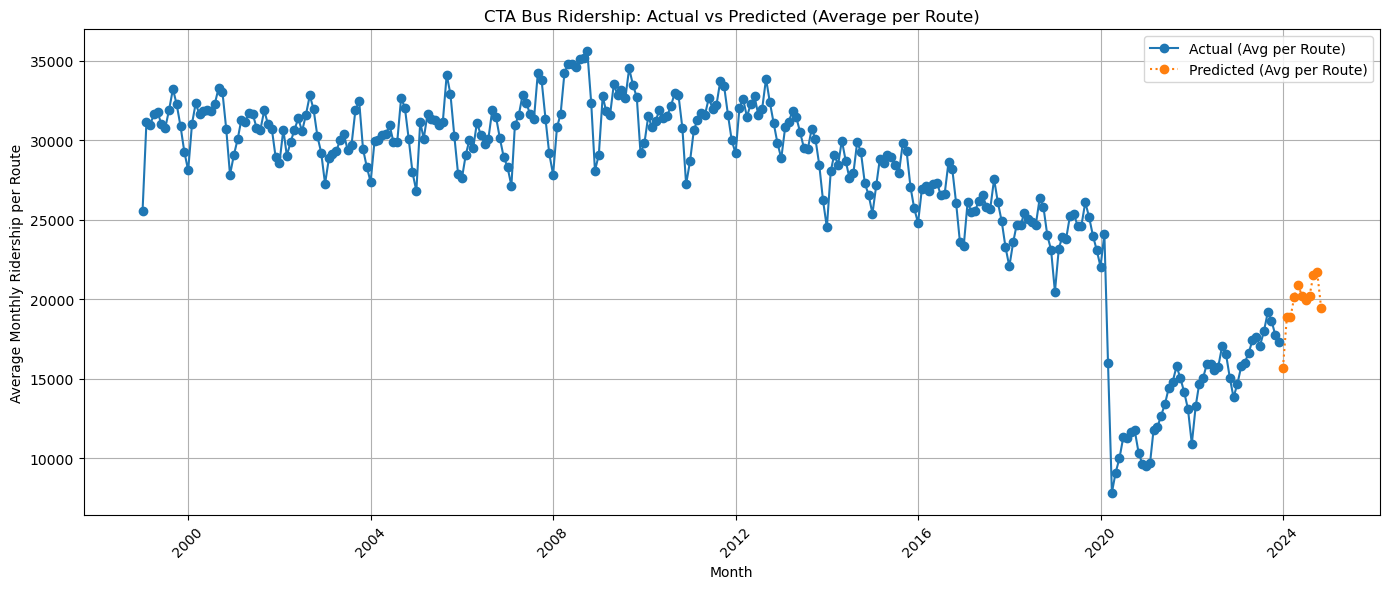

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and clean dataset
file_path = "CTA_Average_Bus_Ridership_1999_2024_inceased_service.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()  # Clean column names

# Convert date column ('DATE') to datetime and assign to 'month'
df["month"] = pd.to_datetime(df["DATE"])

# Feature engineering
df["year"] = df["month"].dt.year
df["month_num"] = df["month"].dt.month

# Encode 'BUS' column as numeric route
le = LabelEncoder()
df["route_encoded"] = le.fit_transform(df["BUS"])

# Define features and target
features = [
    "route_encoded",
    "year",
    "month_num",
    "Weekday",
    "Saturday",
    "Sunday - Holiday"
]
target = "Sum"  # This is the total monthly ridership

# Split into training and testing
train_df = df[df["month"] <= "2023-12-31"]
test_df = df[df["month"] >= "2024-01-01"]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Train KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Prepare data for plotting (average per route per month)
train_avg = train_df.groupby("month")["Sum"].mean().reset_index()
test_df = test_df.copy()
test_df["predicted"] = y_pred
test_avg = test_df.groupby("month")["predicted"].mean().reset_index()

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(train_avg["month"], train_avg["Sum"], label="Actual (Avg per Route)", marker='o')
plt.plot(test_avg["month"], test_avg["predicted"], label="Predicted (Avg per Route)", linestyle='dotted', marker='o')
plt.xlabel("Month")
plt.ylabel("Average Monthly Ridership per Route")
plt.title("CTA Bus Ridership: Actual vs Predicted (Average per Route)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
